In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


# Word2Vec

In [3]:
import pandas as pd

from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [1]:
from gensim.models import Word2Vec
import os

# the directory path of tokenized files
data_directory = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates'

# Initialize an empty list to store sentences
sentences = []
print("here")

# Iterate through each file in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_directory, filename)
        print(f"Processing file: {file_path}")

        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            file_sentences = [line.split() for line in file]

        # Add the sentences from this file to the overall list
        sentences.extend(file_sentences)
        
        print(f"Processed {len(file_sentences)} sentences from {file_path}")

here
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1800_1849_tokenized.txt
Processed 455320 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1800_1849_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1850_1920_tokenized.txt
Processed 942551 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1850_1920_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1921_1970_tokenized.txt
Processed 1339764 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1921_1970_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1971_1990_tokenized.txt
Processed 1025994 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1971_1990_tokenized.t

In [2]:
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

print("Training Word2Vec Model")

# Save the trained model
model.save('word2vec_model.bin')

print("Word2Vec Model training completed")

Training Word2Vec Model
Word2Vec Model training completed


In [3]:
from gensim.models import Word2Vec

# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model.bin')


In [4]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('men', 0.6022253632545471), ('female', 0.5765068531036377), ('sex', 0.5569344162940979), ('unmarried', 0.5505144596099854), ('wife', 0.5437403321266174)]


In [5]:
# Find words similar to the word women
similar_words = model.wv.most_similar('women', topn=5)
print(f"Similar words to 'women': {similar_words}")

KeyError: "Key 'women' not present in vocabulary"

In [6]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=15)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('men', 0.6022253632545471), ('female', 0.5765068531036377), ('sex', 0.5569344162940979), ('unmarried', 0.5505144596099854), ('wife', 0.5437403321266174), ('girl', 0.5319264531135559), ('inspectorinspectorsergeantconstabletotal', 0.4870729446411133), ('bisexual', 0.4854346513748169), ('childbirth', 0.4817197620868683), ('menopause', 0.4792359173297882), ('mother', 0.4747985005378723), ('adult', 0.46753647923469543), ('ranksavon', 0.459628701210022), ('married', 0.45891711115837097), ('widower', 0.45504724979400635)]


In [7]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.6573125720024109), ('someone', 0.6129646897315979), ('wife', 0.5151177644729614), ('father', 0.5068652629852295), ('husband', 0.5031120181083679)]


In [8]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=15)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.6573125720024109), ('someone', 0.6129646897315979), ('wife', 0.5151177644729614), ('father', 0.5068652629852295), ('husband', 0.5031120181083679), ('person', 0.5005711913108826), ('lad', 0.49994152784347534), ('somebody', 0.48950695991516113), ('people', 0.4825318157672882), ('loses', 0.4725981056690216), ('forehead', 0.46716415882110596), ('son', 0.4664529860019684), ('chap', 0.46079021692276), ('policeman', 0.45232799649238586), ('fellow', 0.44959431886672974)]


In [9]:
# Find words similar to the word suffrage
similar_words = model.wv.most_similar('suffrage', topn=15)
print(f"Similar words to 'suffrage': {similar_words}")

Similar words to 'suffrage': [('franchise', 0.6967247128486633), ('elective', 0.44971323013305664), ('enfranchisement', 0.4441656172275543), ('disfranchisement', 0.3948650360107422), ('voter', 0.38702261447906494), ('enfranchising', 0.3859948217868805), ('plebiscito', 0.3855326175689697), ('ballot', 0.3840750753879547), ('democracy', 0.37846261262893677), ('enfranchised', 0.37578168511390686), ('unenfranchised', 0.3753224313259125), ('elector', 0.36752188205718994), ('electorate', 0.36141765117645264), ('voting', 0.3577018678188324), ('electoral', 0.35663434863090515)]


In [10]:
similar_words = model.wv.most_similar('equality', topn=15)
print(f"Similar words to 'equality': {similar_words}")

Similar words to 'equality': [('equal', 0.7007212042808533), ('discrimination', 0.5479030609130859), ('gender', 0.4699892997741699), ('racial', 0.46831169724464417), ('sex', 0.4617367386817932), ('equalityasked', 0.4479593336582184), ('parity', 0.4447823464870453), ('footing', 0.43004098534584045), ('inequality', 0.42711105942726135), ('counciltechnician', 0.41014912724494934), ('toleration', 0.3866822123527527), ('differentiation', 0.3797881007194519), ('discriminated', 0.37864622473716736), ('ethnicity', 0.37448111176490784), ('discriminationasked', 0.3744088411331177)]


In [11]:
#the vector representation of the word woman
vector = model.wv['woman']
print(f"Vector representation of 'woman': {vector}")

Vector representation of 'woman': [ 1.2596273  -0.37490997  0.35141307  1.6662583   1.8601185   1.2944701
  1.8451197  -2.613087   -1.0320278  -2.7902799   5.3885818  -2.8061728
 -4.163704    6.209544   -2.6131723  -0.6906628  -0.09385203 -0.22449662
  1.555293    3.4583585  -0.38106006  0.01359362 -2.5155559   0.41958383
  0.6414971   0.9862824   5.1001277   2.2969584   2.9962327  -1.571529
  1.1931751  -4.8946195  -4.4460225  -0.71358675 -2.5959702  -3.646962
 -0.7700778   2.4266865  -0.21357638 -5.107355    0.20069548  1.7830408
 -1.1266327   0.9309858   0.4769537   2.1963851  -3.4812715   2.010043
 -1.1985118   3.368584   -2.7620614  -0.36982888 -2.9934907  -1.6390448
  4.094822    0.68415284  5.205577   -1.0029396  -0.12486371 -0.64282227
  1.0746623  -1.7533293  -0.48268116  1.8293387   1.1097598  -1.8652557
  4.912996    2.001658    1.3285235   1.673661    0.1836471   5.748503
  1.8428426   2.290265   -0.6366504  -2.4045913  -2.7446518  -3.1501203
 -0.8905128  -2.7381275  -2.110

In [12]:
#word analogy
analogy_result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('queen', 0.4924481213092804)]


In [13]:
#word analogy
analogy_result = model.wv.most_similar(positive=['father', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('mother', 0.5855175256729126)]


In [14]:
#word analogy
analogy_result = model.wv.most_similar(positive=['human', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('sex', 0.3916843831539154)]


In [15]:
#word analogy
analogy_result = model.wv.most_similar(positive=['gentleman', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('baronet', 0.5580355525016785)]


In [16]:
#word analogy
analogy_result = model.wv.most_similar(positive=['loyal', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('faithful', 0.3875488042831421)]


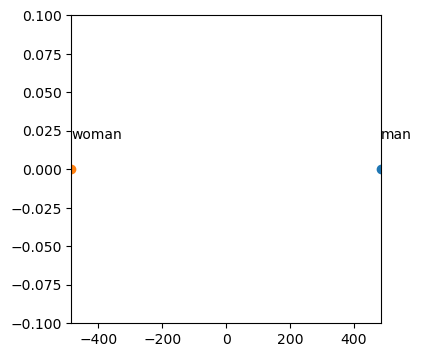

In [17]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Visualize embeddings of 'man' and 'woman'
words_to_visualize = ['man', 'woman']
vectors_to_visualize = np.array([model.wv[word] for word in words_to_visualize])

# Check the number of samples
n_samples, n_features = vectors_to_visualize.shape

# Ensuring perplexity is less than the number of samples
perplexity = min(3, n_samples - 1)

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
vectors_2d = tsne.fit_transform(vectors_to_visualize)

plt.figure(figsize=(4, 4))
plt.xlim(vectors_2d[:, 0].min() - 0.1, vectors_2d[:, 0].max() + 0.1)
plt.ylim(vectors_2d[:, 1].min() - 0.1, vectors_2d[:, 1].max() + 0.1)

for i, word in enumerate(words_to_visualize):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.text(vectors_2d[i, 0] + 0.02, vectors_2d[i, 1] + 0.02, word)

plt.show()


# Word2Vec for the year 1800-1849

In [18]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1800_1849_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_1.bin')

print("Word2Vec Model training completed")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1800_1849_tokenized.txt
Processed 455320 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1800_1849_tokenized.txt
Word2Vec Model training completed


In [19]:
from gensim.models import Word2Vec

# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model_1.bin')

In [22]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=10)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('girl', 0.6130533218383789), ('female', 0.6100981831550598), ('wife', 0.5985001921653748), ('child', 0.5464219450950623), ('husband', 0.5307227969169617), ('seducer', 0.5158628225326538), ('daughter', 0.49284297227859497), ('unmarried', 0.4820486605167389), ('married', 0.4728690981864929), ('dog', 0.46741360425949097)]


In [23]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.499930202960968), ('creature', 0.4199649691581726), ('fool', 0.3968293070793152), ('englishman', 0.3779997229576111), ('wretch', 0.3754134774208069)]


# Word2Vec for the year 1850-1920

In [24]:
from gensim.models import Word2Vec
import os

# the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1850_1920_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_2.bin')

print("Word2Vec Model training completed")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1850_1920_tokenized.txt
Processed 942551 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1850_1920_tokenized.txt
Word2Vec Model training completed


In [25]:
# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model_2.bin')

In [26]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('sex', 0.6105426549911499), ('female', 0.5254074931144714), ('adult', 0.5126000642776489), ('wife', 0.5085448026657104), ('girl', 0.49538668990135193)]


In [27]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.5996216535568237), ('person', 0.4655570685863495), ('policeman', 0.43965616822242737), ('sparrowbill', 0.42352280020713806), ('fool', 0.41849204897880554)]


# Word2Vec for the year 1921-1970

In [28]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1921_1970_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_3.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_3.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")


Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1921_1970_tokenized.txt
Processed 1339764 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1921_1970_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('men', 0.555997908115387), ('wife', 0.4957621097564697), ('sex', 0.47074177861213684), ('young', 0.4678460955619812), ('girl', 0.459478497505188)]
Similar words to 'man': [('men', 0.6451320648193359), ('lad', 0.5397100448608398), ('someone', 0.5368929505348206), ('husband', 0.5136544108390808), ('wife', 0.4950489401817322)]


# Word2Vec for the year  1971-1990

In [29]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1971_1990_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_4.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_4.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")


Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1971_1990_tokenized.txt
Processed 1025994 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1971_1990_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('men', 0.5502896308898926), ('mother', 0.4836650788784027), ('marries', 0.45573902130126953), ('returners', 0.45136409997940063), ('inspectorinspectorsergeantconstabletotal', 0.44561102986335754)]
Similar words to 'man': [('men', 0.6083616018295288), ('chap', 0.5421302914619446), ('someone', 0.5174940824508667), ('wife', 0.4833219647407532), ('father', 0.45133188366889954)]


# Word2Vec for the year 1991-2006

In [30]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1991_2006_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_5.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_5.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1991_2006_tokenized.txt
Processed 597305 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates/1991_2006_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('men', 0.6055730581283569), ('bisexual', 0.497183620929718), ('pregnant', 0.45050108432769775), ('childbirth', 0.4457819163799286), ('gay', 0.4387279748916626)]
Similar words to 'man': [('men', 0.5722330808639526), ('someone', 0.500737190246582), ('son', 0.4917178452014923), ('daughter', 0.4793843626976013), ('husband', 0.47809159755706787)]


# Word Analogy differences between all the years

In [31]:
from gensim.models import Word2Vec
model_1849 = Word2Vec.load('word2vec_model_1.bin')
model_1920 = Word2Vec.load('word2vec_model_2.bin')
model_1970 = Word2Vec.load('word2vec_model_3.bin')
model_1990 = Word2Vec.load('word2vec_model_4.bin')
model_2006 = Word2Vec.load('word2vec_model_5.bin')

# Association of woman to childbirth

## For the year 1800-1850

In [32]:
analogy_result = model_1849.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1800-1849: {analogy_result}")
analogy_result = model_1920.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1850-1920: {analogy_result}")
analogy_result = model_1970.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1921-1970: {analogy_result}")
analogy_result = model_1990.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1971-1990: {analogy_result}")
analogy_result = model_2006.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1991-2006: {analogy_result}")

Word analogy result for the year 1800-1849: [('childish', 0.2966958284378052)]
Word analogy result for the year 1850-1920: [('doctor', 0.3391333520412445)]
Word analogy result for the year 1921-1970: [('pregnancy', 0.4149561822414398)]
Word analogy result for the year 1971-1990: [('manasked', 0.34653785824775696)]
Word analogy result for the year 1991-2006: [('walked', 0.36458632349967957)]


In [33]:
analogy_result = model_1849.wv.most_similar(positive=['seducer', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1800-1849: {analogy_result}")
analogy_result = model_1920.wv.most_similar(positive=['seducer', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1850-1920: {analogy_result}")
analogy_result = model_1970.wv.most_similar(positive=['seducer', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1921-1970: {analogy_result}")
analogy_result = model_1990.wv.most_similar(positive=['seducer', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1971-1990: {analogy_result}")

Word analogy result for the year 1800-1849: [('creature', 0.29993459582328796)]
Word analogy result for the year 1850-1920: [('mortal', 0.3551318943500519)]
Word analogy result for the year 1921-1970: [('chap', 0.3808192014694214)]


KeyError: "Key 'seducer' not present in vocabulary"

In [34]:
analogy_result = model_2006.wv.most_similar(positive=['seducer', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result for the year 1991-2006: {analogy_result}")

KeyError: "Key 'seducer' not present in vocabulary"

# Statements where the word "SEDUCER" is used

In [1]:
import os
import nltk
from nltk.tokenize import sent_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def get_list_of_text_files(directory_path):
    return [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.txt')]

In [4]:
# Function to load the corpus from a file
def load_corpus(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

In [8]:
# Function to find sentences
def find_sentences_containing_word(sentences, word, filename):
    return {(sentence, filename) for sentence in sentences if word in sentence.lower()}

In [6]:
# Function to print full sentences with file info
def print_full_sentences(sentences_with_files):
    for sentence, filename in sentences_with_files:
        print(f"File: {filename}\nSentence: {sentence}\n")

In [9]:
directory_path = "/Users/shaistasyeda/Desktop/DataSet/merged-files"  
file_list = get_list_of_text_files(directory_path)

all_sentences = set()

for file in file_list:
    corpus = load_corpus(file)
    sentences = sent_tokenize(corpus)
    
    context_sentences_for_seducer = find_sentences_containing_word(sentences, "seducer", os.path.basename(file))
    all_sentences.update(context_sentences_for_seducer)

print_full_sentences(all_sentences)

File: 1839_merged.txt
Sentence: He declared that the bastardy enactments had, in many cases, operated to give perfect impunity to the seducer; while it caused, but too often, the suicide of the female, or the murder of the offspring.

File: 1835_merged.txt
Sentence: not upon the priest; not upon the seducer;—no, but upon the unfortunate woman, and her children!

File: 1822_merged.txt
Sentence: "—He knew the law under which these men were proceeded against was an old one; but whatever justice there might be in proceeding against Craven, as the seducer of artificers to leave the country, it was an extraordinary hardship that the men themselves should be pun-

657
ished for attempting to take their industry to a place where they saw the best choice of gaining a livelihood.

File: 1857_merged.txt
Sentence: and learned Gentleman meant to say was, that the adultress should be compelled to remain single during the life of her former husband.said, he thought that if they prevented the intermar